In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_hdf('../data/raw/train.hdf.compress', stop=1000000)

In [3]:
df = df_train.sort_values(by=['ip', 'os', 'device', 'click_time'])
df['is_new_session'] = (df['ip']!=df['ip'].shift()) | (df['os']!=df['os'].shift()) | (df['device']!=df['device'].shift()) | (df['click_time'].diff().dt.total_seconds() > 600)
df['session_id'] = df['is_new_session'].cumsum()
df.drop(columns='is_new_session', inplace=True)

In [6]:
sns.barplot(x="is_attributed", y="survived", hue="class", data=df)

ValueError: Could not interpret input 'survived'

In [4]:
df['click_n'] = df.groupby('session_id').cumcount()

In [15]:
df_downloads = df[df['is_attributed'] == 1].drop_duplicates(['session_id', 'is_attributed'], keep='first')[['session_id', 'click_n']]
df_downloads['download_click_n'] = df_downloads['click_n']

In [17]:
df = df.merge(df_downloads, how='left', on=['session_id', 'click_n'])

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


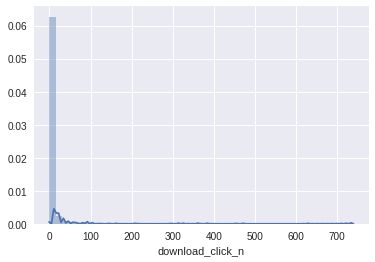

In [47]:
sns.distplot(df[df['download_click_n'].notnull()]['download_click_n'])

In [10]:
df = df.sort_values(by=['ip','click_time'])
df['time_diff'] = df['click_time'].diff()
df.loc[df['ip'] != df['ip'].shift(), 'time_diff'] = None
df['time_diff'] = df.time_diff.dt.total_seconds()
df

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,time_diff
8192,195,9,1,18,215,2017-11-06 16:00:11,NaT,0,NaN
7999,247,2,1,17,477,2017-11-06 16:00:11,NaT,0,NaN
8464,365,15,1,27,245,2017-11-06 16:00:11,NaT,0,NaN
8574,439,3,1,22,280,2017-11-06 16:00:12,NaT,0,NaN
9021,439,12,1,22,265,2017-11-06 16:00:12,NaT,0,0.0
3356,563,12,1,13,140,2017-11-06 16:00:04,NaT,0,NaN
3363,563,9,1,13,442,2017-11-06 16:00:04,NaT,0,0.0
3366,563,1,1,13,153,2017-11-06 16:00:04,NaT,0,0.0
9198,596,13,1,607,400,2017-11-06 16:00:13,NaT,0,NaN
1623,728,27,1,19,122,2017-11-06 16:00:02,NaT,0,NaN
